# Complejidad Algorítmica - Resolucion Examen Parcial

#ALUMNO: Schmidt Avila, Mark
#Codigo: u201810723
#Seccion: CC41

## Instrucciones

1.	El examen consta de 2 preguntas, y tendrá 150 minutos para resolverlas.
2.	Las dos preguntas han de ser respondidas en un único archivo ipython notebook.
3.	Cada examen cuenta con un equipo académico, el cual estará conectado durante los primeros 20 minutos del examen. 
4.	Las dudas conceptuales sobre el examen han de presentarse dentro de los primeros 20 minutos mediante un correo al profesor CANAVAL SANCHEZ, LUIS MARTIN a pcsilcan@upc.edu.pe o al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
5.	Los inconvenientes técnicos pueden presentarse a pasado los primeros 20 minutos, puede comunicarlo al profesor CANAVAL SANCHEZ, LUIS MARTIN a pcsilcan@upc.edu.pe o al profesor GONZALEZ VALENZUELA, RICARDO EUGENIO a pcsirgon@upc.edu.pe.
6.	Los profesores en mención solo recibirán correos provenientes de las cuentas UPC, de ninguna manera se recibirán correos de cuentas públicas. 
7.	Ante problemas técnicos, debe de forma obligatoria adjuntar evidencias del mismo, como capturas de pantalla, videos, fotos, etc. Siendo requisito fundamental que, en cada evidencia se pueda apreciar claramente la fecha y hora del sistema operativo del computador donde el alumno está rindiendo el examen. 
8.	Los correos sobre problemas técnicos se recibirán hasta 15 minutos luego de culminado el examen.


## Pregunta 1 [10 puntos]

La coloración de grafos, normalmente, busca colorear los vértices de un grafo de tal forma que no existan aristas entre vértices del mismo color. En este particular caso, se desea colorear un grafo de dos colores (blanco y negro), sin embargo la restricción será que únicamente los vértices de color negro no puedan estar unidos entre sí (como se muestra en la figura).

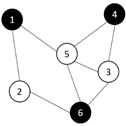

a) Desarrolle un algoritmo que dado cualquien grafo G = (V, E), halle la solución óptima. [6 puntos]

Ingrese la cantidad de vertices y aristas: 6 8
Ingreso la relacion del vertice y arista: 1 2
Ingreso la relacion del vertice y arista: 1 5
Ingreso la relacion del vertice y arista: 2 6
Ingreso la relacion del vertice y arista: 5 6
Ingreso la relacion del vertice y arista: 6 3
Ingreso la relacion del vertice y arista: 5 3
Ingreso la relacion del vertice y arista: 5 4
Ingreso la relacion del vertice y arista: 4 3


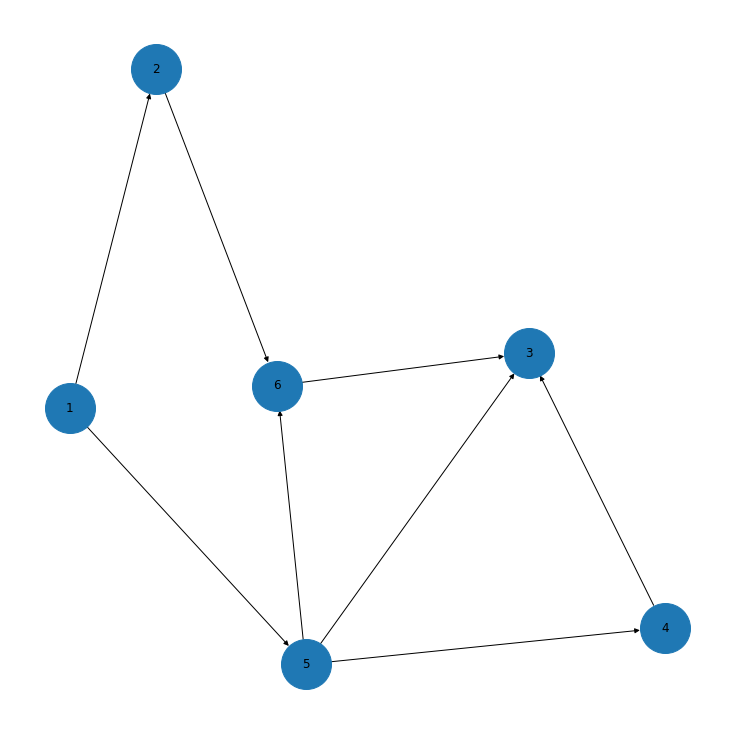

In [1]:
import resource, sys
resource.setrlimit(resource.RLIMIT_STACK, (2**29, -1))
sys.setrecursionlimit(10**7)
import networkx as nx
import matplotlib.pyplot as plt

vertice, arista = [int(x) for x in input("Ingrese la cantidad de vertices y aristas: ").split()] 
G = nx.DiGraph()
for i in range(arista):
  a, b = [int(x) for x in input("Ingreso la relacion del vertice y arista: ").split()]
  G.add_edge(a,b)
  G.nodes[a]['id'] = a
  G.nodes[b]['id'] = b

def Pintar_DFS(grafo, u):
  u['color'] = 'Gris' #proceso
  for _, vertice_id in G.out_edges(u['id']):
    v = G.nodes[vertice_id]
    if v['color'] == 'Blanco':
      v['padre'] = u
      Pintar_DFS(grafo, v)
  u['color'] = 'Negro'

def mostrar_grafo(G):
  plt.figure(1, figsize=(10,10))
  nx.draw(G, with_labels=True, node_size=2500)
  plt.axis("off")

def DFS(G):
  for _, u in G.nodes(data=True):
    u['color'] = 'Negro'
    u['padre'] = None
  for _, u in G.nodes(data=True):
    if u['color'] == 'Blanco':
      Pintar_DFS(G,u)

DFS(G)
mostrar_grafo(G)

b) Indique la complejidad, en el peor caso, para el algoritmo utilizado (justifique su respuesta) [3 puntos] 

<font color='green'>Coloque aquí su respuesta</font>:
Se realiza la complejidad del DFS. Tiempo = n + n = 2n. Entonces es O(n)

c) Indique de que tipo es el algoritmo utilizado: fuerza bruta, backtracking, divide y venceras, etc. (Justifique su respuesta) [1 punto]

<font color='green'>Coloque aquí su respuesta</font>: El algoritmo utilizado es Backtracking

## Pregunta 2 [10 puntos]

Su gobierno requiere que varios de sus documentos legales tengan estampillas, para poder obtener ingresos de ellos. Sin embargo, se limita el número de estampillas (denominado por $nE$) que cada tipo de documento puede tener. Inicialmente su gobierno desea saber hasta cuantas denominaciones de estampillas debe tener considerar. La solución se dará en función del número máximo de estampillas que lleve algún tipo de documento, y el número de denominaciones de estampillas (denominado por $nD$); donde sólo se usarán las denominaciones de estampillas cuyas combinaciones se halle la mayor secuencia continua de números $[Solucion(nE, nD)]$. Por ejemplo:

Si se desea usar máximo 3 estampillas de 2 catégorias

$Solucion(3, 2)$ $\rightarrow$ Usar estampillas de S/1 y S/3 por lo tanto la máxima denominación de estampilla será la de S/3

Una solución podría haber sido usar estampillas de S/1 y S/4, pero estas sólo me permiten combinaciones de hasta 6 valores consecutivos de S/1 a S/6 (así como S/8, S/9 y S/12). 

La solución de usar estampillas de S/1 y S/3, nos permite combinaciones que involucran 7 valores consecutivos de S/1 a S/7 (así como S/9). 

Dados los valores de $nE$ y $nD$, indique:

*   las denominaciones de estampillas que usaría;
*   el valor de la máxima denominación de estampilla; y 
*   el valor máximo de la secuencia continua de combinaciones.

**Entrada del algoritmo:**  Valores de $nE$ y $nD$ (e.g.: 3 y 2)

**Salida del algoritmo:**  Valores de las estampillas a usar, y hasta cuantas combinaciones consecutivas, empezando en uno, permiten tener (e.g.: Imprima estampillas de S/1 y S/3, le permite tener 7 combinaciones consecutivas).


In [2]:
# Desarrolle aqui su solución (sientase libre de usar mas cajas de código si lo requiere)
costo = [1,3] # estampillas de S/1 y S/3
combinaciones = [int(x) for x in range(1, 100000)] # Analizar si llega a las 100000 combinaciones
max = 0
for j in range(len(combinaciones)):
  for i in range(len(costo)):
    if costo[i] == combinaciones[j]:
      max += 1
      print(costo[i], "=", combinaciones[j])
    elif costo[i] + costo[i - 2] == combinaciones[j]:
      max += 1
      print(costo[i], "+", costo[i - 2], "=", combinaciones[j])
    elif costo[i] + costo[i - 1] == combinaciones[j]:
      max += 1
      print(costo[i], "+", costo[i - 1], "=", combinaciones[j])
    elif costo[i] + costo[i - 1] + costo[i - 2] == combinaciones[j]:
      max += 1
      print(costo[i], "+", costo[i - 1], "+", costo[i - 2], "=", combinaciones[j])
print("La maxima cantidad de combinaciones consecutivas es: ", max - 1)  # Es menos 1, porque el valor "4" se repite, es la combinacion "1 + 3". Pero al reves

1 = 1
1 + 1 = 2
3 = 3
1 + 3 = 4
3 + 1 = 4
1 + 3 + 1 = 5
3 + 3 = 6
3 + 1 + 3 = 7
La maxima cantidad de combinaciones consecutivas es:  7
